# Noise cancellation in speech using LMS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wv
from scipy import signal
from lms import LMS

M = 100  # Number of filter taps in adaptive filter
step = 0.2  # LMS Step size
L = 10000 #optional argument to run with shorter signal

### Input speech - information bearing signal / data signal

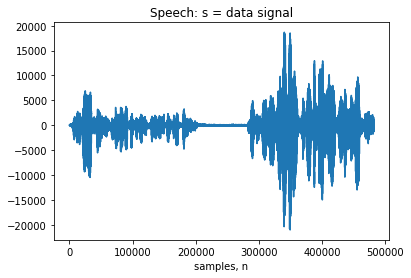

In [3]:
#Input speech - information bearing signal / data signal
s_rate, s = wv.read('obama.wav')
#s = s[:L]
# Plot
plt.figure();plt.xlabel("samples, n");
plt.title("Speech: s = data signal"); plt.plot(s)


### Let's listen to the clean speech!

In [4]:
import IPython.display as ipd
ipd.Audio('obama.wav')

### Background noise - white Gaussian or sinusoidal, high amplitude:

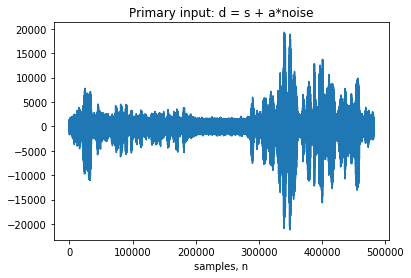

In [4]:
noise_type = "Gaussian"
# Background noise 
if noise_type == "Gaussian":
    noise = 500 * np.random.randn(len(s))
elif noise_type == "sine":
    noise = 500 * np.cos(2*np.pi*20*np.linspace(0,999,len(s))+0.6)
    
# Observed data + noise
d = s + noise 

plt.figure();plt.xlabel("samples, n");
plt.title("Primary input: d = s + a*noise"); plt.plot(d)

wv.write("obama_noisy.wav",s_rate, (d/max(d)*32767).astype('int16'))



### Let's listen to the noisy speech!

In [6]:
import IPython.display as ipd
ipd.Audio('obama_noisy.wav')

### Reference noise signal / correlated noise:

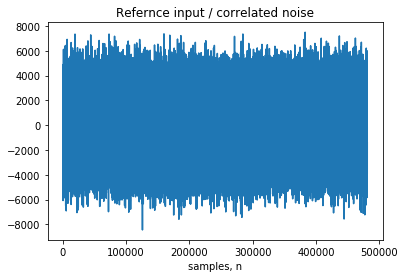

In [5]:
# Reference noise signal / correlated noise
# Different measurement of the noise, with different amplitude
corr_noise = 3.5*noise

# Less correlated noise, assume while measuring it goes through a low pass filter
#b = signal.firwin(11, 0.4)
#corr_noise = signal.lfilter(b, 1, noise)

plt.figure();plt.xlabel("samples, n"); 
plt.title("Refernce input / correlated noise"); plt.plot(corr_noise)

### LMS

In [6]:
lms = LMS(L=M, step=step)
e,y,w = lms.adapt(corr_noise, d, normalize=True)


LMS successfully adapted the weights!


/Users/digbalaybose/miniconda3/lib/python3.5/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


### Write wav files to listen 

In [7]:
# Write wav files to listen 
wv.write('recovered.wav', s_rate, (e/max(e)*32767).astype('int16'))

### Plot output and error

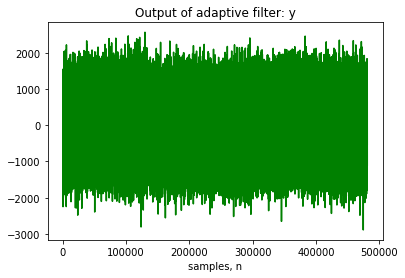

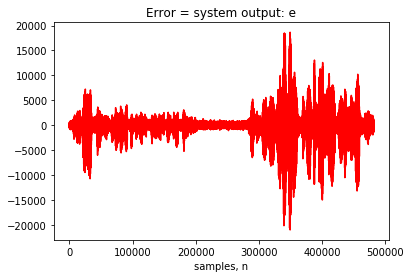

In [8]:
plt.figure();plt.xlabel("samples, n"); 
plt.title("Output of adaptive filter: y"); plt.plot(y,"g")
plt.figure();plt.xlabel("samples, n"); 
plt.title("Error = system output: e"); plt.plot(e, 'r')
plt.show()

# Now, let's listen to the (supposedly) recovered audio files

In [11]:
import IPython.display as ipd
ipd.Audio('recovered.wav')